In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from lmfit import models

In [28]:
data = pd.read_csv('doppler broad 7 dec.csv', delimiter = ',')
voltage = np.array(data.iloc[:,4])
time = np.array(data.iloc[:,3])

datafree = pd.read_csv('doppler free zeeman 7 dec.csv', delimiter = ',')
voltagefree = np.array(datafree.iloc[:,4])
voltagefree2 = np.array(datafree.iloc[:,10])
timefree = np.array(datafree.iloc[:,3])

# voor de visualisatie:
voltagefree2 = voltagefree2 - 0.0135



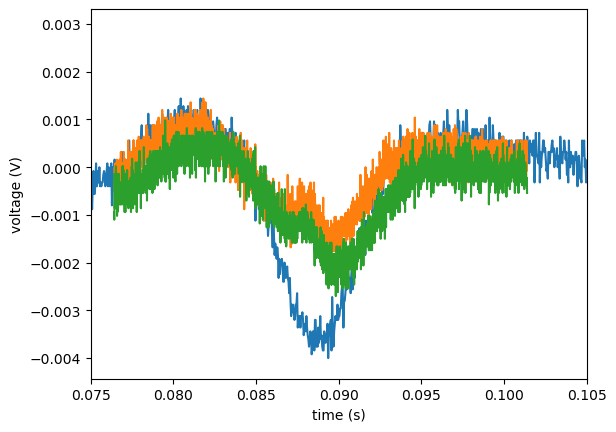

In [29]:
plt.plot(time, voltage)
plt.plot(timefree, voltagefree)
plt.plot(timefree, voltagefree2)
plt.xlim(0.075, 0.105)

plt.xlabel('time (s)')
plt.ylabel('voltage (V)')
plt.show()

## Doppler broad fit (frequentie as)

In [33]:
def gaussian(x, A, mu, sigma):
    return A* np.exp(-(x - mu)**2 / (2 * sigma**2))
def line(x, a, b):
    return a*x + b

In [34]:

gauss1 = models.Model(gaussian, prefix='p1_') 
gauss2 = models.Model(gaussian, prefix='p2_') 
gauss3 = models.Model(gaussian, prefix='p3_') 
gauss4 = models.Model(gaussian, prefix='p4_')
linfunctie = models.Model(line, name="lijn")

curve_model = gauss1 + gauss2 + gauss3 + gauss4 + linfunctie

In [53]:

params = curve_model.make_params(p1_A = -11, p1_mu=0.075, p1_sigma=0.003, p2_A = -11, p2_mu=0.09, p2_sigma=0.003, p3_A = -11, p3_mu=0.12, p3_sigma=0.003, p4_A=-11, p4_mu=0.15, p4_sigma=0.001,a=-0.06,b=1)
fit_result = curve_model.fit(voltage, params,x = time )

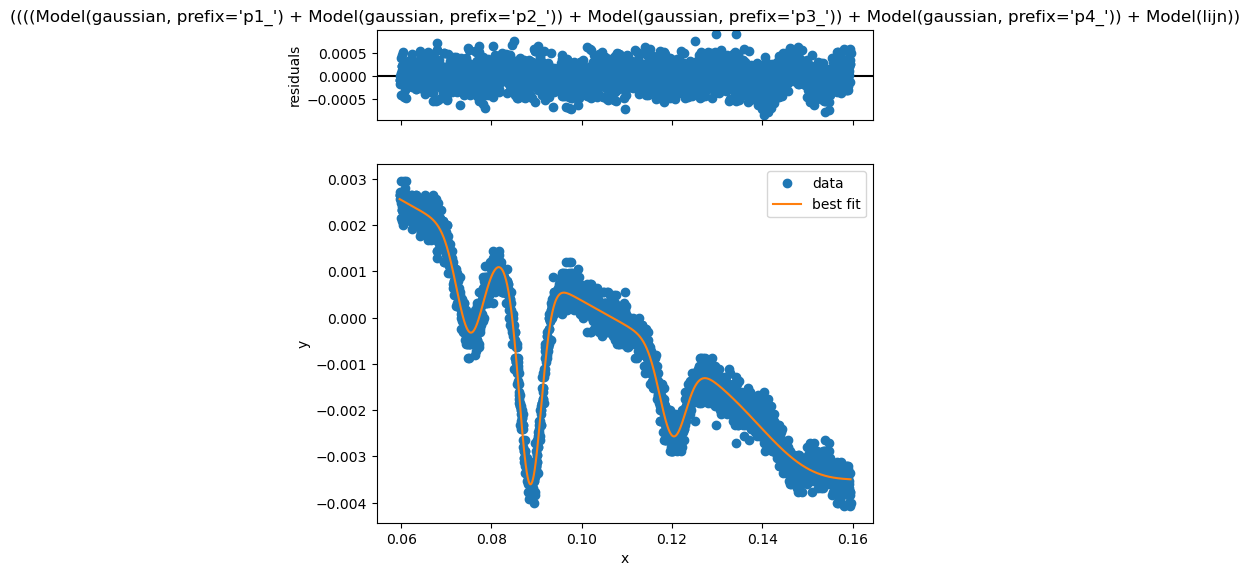

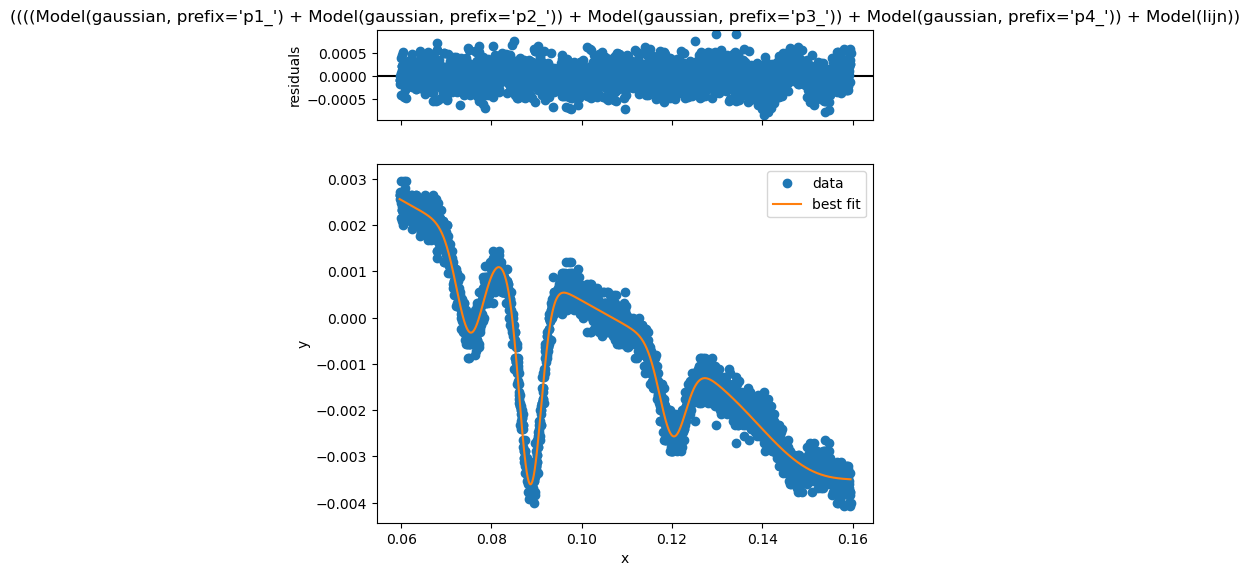

In [54]:
fit_result.plot()

In [39]:
fit_result

In [57]:
a = 6834.683/(fit_result.params['p4_mu'].value - fit_result.params['p1_mu'].value)
b = -4271.677 - fit_result.params['p1_mu'].value*a
frequency = a*time + b

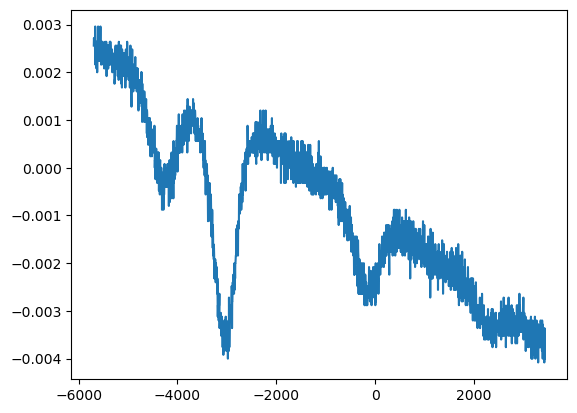

In [58]:
plt.plot(frequency, voltage)
plt.show()

## Doppler free zeeman splitted fit

In [ ]:
def gaussian(time, A, mu, sigma):
    return A* np.exp(-(time - mu)**2 / (2 * sigma**2))
def line(time, a, b):
    return a*time + b

In [ ]:
gauss1 = models.Model(gaussian, prefix='p1_')
gauss2 = models.Model(gaussian, prefix='p2_')
gauss3 = models.Model(gaussian, prefix='p3_')
linear_function = models.Model(line, name="lijn")

In [ ]:
curve1 = gauss1 + gauss2 + linear_function
params = curve1.make_params(p1_A = -1, p1_mu=-0.013, p1_sigma=0.001, p2_A = -1.2, p2_mu=-0.012, p2_sigma=0.003,a=-0.6,b=5.2)
fit_curve1 = curve1.fit(voltage1, params,time=time )

fit_curve1.plot()